# Loading and Exploring Step-1
Using pandas methods to load and explore the dtypes and range of the data

In [1]:
#Loading the data

import pandas as pd

df = pd.read_csv('Desktop/widebot_task2/training.csv',sep=';')
valid = pd.read_csv('Desktop/widebot_task2/validation.csv',sep=';')

df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null object
variable3     3700 non-null object
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null object
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


In [3]:
#Summary stat.
df.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


# Cleaning : Step-1
It seems that variables (2,3,8) are wrongly classified as strings, rather than float.

In [4]:
def str_to_float(df,cols):
    df_new = df.copy()
    
    for col in cols:
        df_new[col] = df_new[col].str.replace(",",".")
        df_new[col] = df_new[col].astype('float')
        
    return df_new

df_2 = str_to_float(df,['variable2','variable3','variable8'])
valid_2 = str_to_float(valid,['variable2','variable3','variable8'])

# Exploring Step-2
Using correlation heatmap to get intution about any redundant features 

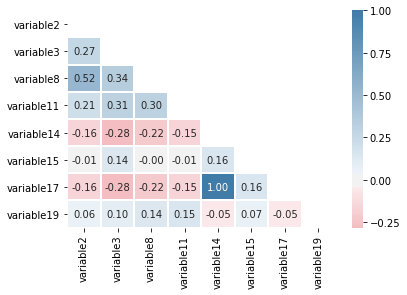

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

#Correlation between features

def corr_heatmap(df):
    """
    Plotting heatmap of corr. coefs without displaying redundant coefs
    
    """
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype = bool))
    cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
    sns.heatmap(df.corr(),mask=mask,center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f')
    plt.show()

corr_heatmap(df_2)

# Cleaning : Step-2
It seems that variables (14,17) are the same feature but scaled. 

In [7]:
df_2 = df_2.drop(['variable17','variable18'],axis=1) #Drop variable17 as it's redendunt & drop variable18 because it has 50% nan values
valid_2 = valid_2.drop(['variable17','variable18'],axis=1)

# Exploring Step-3
Using conditional entropy to know how correlated are categorical columns

Entropy of Y given X = 0  if and only if the value of Y is completely determined by the value of X

Source : https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [8]:
from dython.nominal import conditional_entropy
from collections import Counter
import scipy.stats as ss


#Calculating conditional entropy in order to calc. correlation between categorical featuers

def nominal_association(x, y):

    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1.0
    else:
        return (s_x - s_xy) / s_x

In [9]:
#Constructing list of categorical_columns
cat_cols = []
non_cat_cols = []
for col in df_2.columns:
    if(df_2[col].dtype == 'object'):
        cat_cols.append(col)
    else:
        non_cat_cols.append(col)
#Dropping highly correleted categorical features as it may be redendunt
to_drop = []

for col1 in cat_cols:
    for col2 in cat_cols:
        
        if col1 == col2:
            continue
        
        if(nominal_association(df_2[col1],df_2[col2]) > 0.7):
            to_drop.append(col1)
to_drop

['variable4', 'variable5']

# Cleaning : Step-3
It seems that variables (4,5) are the same feature but shifted. 
We'll also drop na values as they form a little percentage of the data

In [10]:
df_2 = df_2.drop('variable4',axis=1) # Drop 1 of the features

valid_2 = valid_2.drop('variable4',axis=1)

cat_cols.remove('variable4')

df_2 = df_2.dropna() #Drop na values as they don't contain alot of our data
valid_2 = valid_2.dropna()

# Preprocessing: Scaling :
Using describe method on our df, we see that they have very different scales ranges from 0.1 to 1 million
so we must scale the data to get accuarte result and not to overfit the training set

In [12]:
features = df_2.loc[:,non_cat_cols] 

valid_features = valid_2.loc[:,non_cat_cols]

#Scaling our features because they have very different ranges!

from sklearn.preprocessing import StandardScaler

# Scale the features to fit for PCA
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)
scaled_valid_features = scaler.transform(valid_features)

scaled_train_features = pd.DataFrame(scaled_train_features)
scaled_valid_features = pd.DataFrame(scaled_valid_features)

scaled_train_features.columns = features.columns
scaled_valid_features.columns = valid_features.columns

In [13]:
df_3 = pd.concat([scaled_train_features,df_2.drop(non_cat_cols,axis=1)],axis=1) # Concat. categorical and num. data
valid_3 = pd.concat([scaled_valid_features,valid_2.drop(non_cat_cols,axis=1)],axis=1)

df_3.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable19,variable1,variable5,variable6,variable7,variable9,variable10,variable12,variable13,classLabel
0,-1.197462,-0.997961,-0.398754,-0.478761,-0.529294,-0.252573,-3.556847,a,g,c,v,f,t,t,g,no.
1,-1.277506,-1.035769,-0.730479,-0.624198,0.240989,-0.253143,-3.556847,b,p,k,v,f,f,f,s,no.
2,-0.130472,-0.890069,-0.796369,-0.478761,-0.426590,-0.250975,-3.556847,b,g,ff,ff,f,t,f,g,no.
3,1.223877,-0.851338,-0.720255,-0.624198,-1.042816,-0.239446,-3.556847,a,g,i,o,f,f,f,g,no.
4,-0.044024,-0.452046,-0.682765,-0.624198,0.446397,-0.253143,-3.556847,b,g,k,v,f,f,t,g,no.


# Preprocessing: OneHotEncoding :

In [14]:
#one_hot encoding categorical features

def one_hot_encode(df,cols):
    df_new = df.copy()
    df_cat = pd.get_dummies(df_new[cols],drop_first=True)
    df_new.drop(cols,axis=1,inplace=True)
    df_new = pd.concat([df_new,df_cat],axis=1)    
    
    return df_new

df_3 = one_hot_encode(df_3,cat_cols)
valid_3 = one_hot_encode(valid_3,cat_cols)


In [15]:
valid_3.columns

Index(['variable2', 'variable3', 'variable8', 'variable11', 'variable14',
       'variable15', 'variable19', 'variable1_b', 'variable5_p',
       'variable6_aa', 'variable6_c', 'variable6_cc', 'variable6_d',
       'variable6_e', 'variable6_ff', 'variable6_i', 'variable6_j',
       'variable6_k', 'variable6_m', 'variable6_q', 'variable6_x',
       'variable7_dd', 'variable7_ff', 'variable7_h', 'variable7_j',
       'variable7_n', 'variable7_v', 'variable7_z', 'variable9_t',
       'variable10_t', 'variable12_t', 'variable13_s', 'classLabel_yes.'],
      dtype='object')

# We should drop columns 
[`variable13_p`,`variable5_gg`,`variable6_r`,`variable7_o`] from training data as they do not exist in validation columns

In [16]:
df_3.drop(['variable13_p','variable5_gg','variable6_r','variable7_o'],axis=1,inplace=True) # Unuseful columns as they don't appear in the validation set

df_3.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable19,variable1_b,variable5_p,variable6_aa,...,variable7_h,variable7_j,variable7_n,variable7_v,variable7_z,variable9_t,variable10_t,variable12_t,variable13_s,classLabel_yes.
0,-1.197462,-0.997961,-0.398754,-0.478761,-0.529294,-0.252573,-3.556847,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,-1.277506,-1.035769,-0.730479,-0.624198,0.240989,-0.253143,-3.556847,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.130472,-0.890069,-0.796369,-0.478761,-0.426590,-0.250975,-3.556847,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.223877,-0.851338,-0.720255,-0.624198,-1.042816,-0.239446,-3.556847,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.044024,-0.452046,-0.682765,-0.624198,0.446397,-0.253143,-3.556847,1,0,0,...,0,0,0,1,0,0,0,1,0,0


# Feature-Engineering: PCA :
I'll do PCA as i think that some features don't participate in the varaince of our data

array([0.23397208, 0.12289545, 0.10672792, 0.09548209, 0.08333368,
       0.06053817, 0.04727396, 0.03963593, 0.03466947, 0.03044037,
       0.02345362, 0.01749974, 0.01531085, 0.01265422, 0.01146017,
       0.00935448, 0.00902381, 0.00669346, 0.00595266, 0.00555022,
       0.00499317, 0.00485559, 0.00390446, 0.00308246, 0.00278898,
       0.00267107, 0.00163182, 0.0011014 , 0.00088307, 0.00084181,
       0.00071175, 0.00034959, 0.00026246])

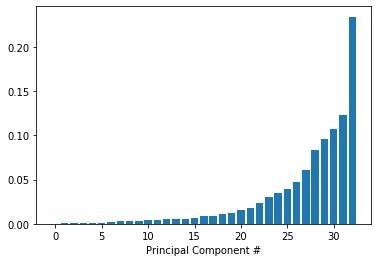

In [17]:
%matplotlib inline

from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(df_3.dropna())
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(x = np.arange(32,-1,-1),height =exp_variance)
ax.set_xlabel('Principal Component #')
exp_variance

# Feature-Engineering: PCA :
I'll view cumilative variance and decicde if i can drop some features

### Edit : I used 100% rather than 95% to get the total variance from the data as i don't have a reason for dropping features because the data isn't that big.
### The plot shows that we have about 7-8 features from 33 that contains the most of the information !!

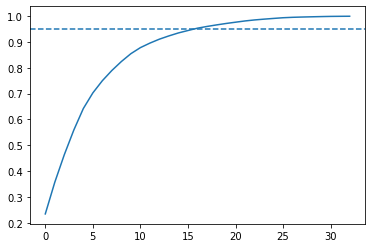

In [18]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.95, linestyle='--')
plt.show()


# choose the n_components where about 95% of our variance can be explained then we drop about 6 columns that have no variance
n_components = np.sum(cum_exp_variance <= 1)

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(df_3.dropna())
pca_projection = pca.transform(df_3.dropna())
pca_projection_validation = pca.transform(valid_3.dropna())

In [20]:
clean_df = pd.concat([pd.DataFrame(pca_projection),df_3.dropna()[['classLabel_yes.']]],axis=1) #Concat the features and the target
clean_df_validation = pd.concat([pd.DataFrame(pca_projection_validation),valid_3.dropna()[['classLabel_yes.']]],axis=1)

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 34 columns):
0                  3522 non-null float64
1                  3522 non-null float64
2                  3522 non-null float64
3                  3522 non-null float64
4                  3522 non-null float64
5                  3522 non-null float64
6                  3522 non-null float64
7                  3522 non-null float64
8                  3522 non-null float64
9                  3522 non-null float64
10                 3522 non-null float64
11                 3522 non-null float64
12                 3522 non-null float64
13                 3522 non-null float64
14                 3522 non-null float64
15                 3522 non-null float64
16                 3522 non-null float64
17                 3522 non-null float64
18                 3522 non-null float64
19                 3522 non-null float64
20                 3522 non-null float64
21                 3522 non-null

In [22]:
clean_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,classLabel_yes.
0,-2.020517,-2.166320,2.216342,1.012286,0.687479,-0.884813,-0.672327,-0.604377,0.245250,0.546163,...,0.124909,-0.133806,0.041788,-0.002328,0.013106,0.039774,-0.031394,0.023544,0.021715,0
1,-2.567638,-1.905093,2.482411,0.769076,0.967506,-0.515926,-0.595599,-0.535671,-0.394931,-0.429322,...,-0.071966,-0.083928,-0.056379,-0.029923,0.015408,0.012187,-0.026416,0.004345,0.085190,0
2,-1.709336,-2.152101,2.609890,0.707820,0.583707,-0.742726,0.240754,0.363708,0.257566,0.277594,...,0.154148,-0.245095,0.018568,-0.016466,-0.015213,-0.028022,-0.054164,-0.005218,-0.021362,0
3,-0.891508,-2.529269,3.032258,0.393005,-0.008155,-1.010130,1.048937,0.767693,-0.615843,0.240580,...,-0.001700,-0.133113,-0.072807,-0.091683,0.016060,0.017931,-0.028174,-0.019221,0.000020,0
4,-1.752253,-1.759495,2.930695,0.349456,0.787221,-0.016175,0.184916,-0.563756,0.138404,-0.485551,...,-0.149169,-0.111647,-0.026900,-0.110926,0.023879,0.030687,-0.007255,-0.008518,0.018119,0


### Check if the dataset is imbalanced dataset as this issue might lead to poor classification

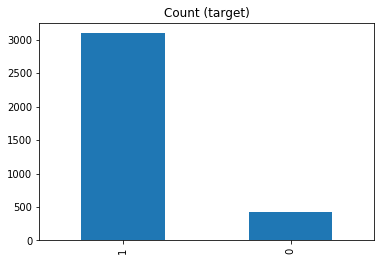

In [23]:
#check if the dataset is Imbalanced dataset

clean_df['classLabel_yes.'].value_counts().plot(kind='bar', title='Count (target)');


### Try using smote over-sampling tech. to overcome the problem of imbalanced-data
### Try also RFC As it's more robust to imbalanced-data than other ML techs.

what is smote ? 
https://www.quora.com/What-is-SMOTE-in-machine-learning

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from imblearn.over_sampling import SMOTE



X = clean_df.drop('classLabel_yes.',axis=1)
y = clean_df[['classLabel_yes.']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


sm = SMOTE(random_state=27)
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)


sm.fit_sample(X_train,y_train)

smote = rfc.fit(X_train, y_train)

smote_pred = smote.predict(X_test)


print(classification_report(y_test,smote_pred))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       757

    accuracy                           1.00       881
   macro avg       1.00      1.00      1.00       881
weighted avg       1.00      1.00      1.00       881



# It looks like the model classified the data very well may be it's overfitting or just the data is separable

### I'll try to visualize it in 2d using t-sne 

what is t-sne ? https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

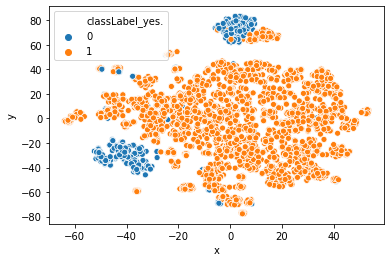

In [25]:
#Using t-sne visualization algorithm to get intution about how separable is the data

from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(clean_df)
clean_df['x'] = tsne_features[:,0]
clean_df['y'] = tsne_features[:,1]

sns.scatterplot(x="x",y="y",data=clean_df,hue = 'classLabel_yes.')

## Making Predictions!!!
Accuarcy is not the best metric in classification tasks
In the classification recall i also take care of precision and recall

In [26]:
#Checking validation data using smote

X_val = clean_df_validation.drop('classLabel_yes.',axis=1)
y_val = clean_df_validation[['classLabel_yes.']]

y_pred_val = smote.predict(X_val)

In [27]:
class_rep_rfc = classification_report(y_val,y_pred_val)

print(class_rep_rfc)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        83

    accuracy                           0.97       191
   macro avg       0.98      0.97      0.97       191
weighted avg       0.97      0.97      0.97       191



## Creating predict function to easily predict coming data

In [28]:
def predict(data,model,scaler,pca):
    
    data = str_to_float(data,['variable2','variable3','variable8'])
    data = data.drop(['variable17','variable18','variable4'],axis=1)
    data = data.dropna()
    
    cat_cols = []
    non_cat_cols = []
    
    for col in data.columns:
        if(data[col].dtype == 'object'):
            cat_cols.append(col)
        else:
            non_cat_cols.append(col)
            
    data_features = data.loc[:,non_cat_cols]

    scaled_data_features = scaler.transform(data_features)
    scaled_data_features = pd.DataFrame(scaled_data_features)

    scaled_data_features.columns = data_features.columns
    
    data_2 = pd.concat([scaled_data_features,data.drop(non_cat_cols,axis=1)],axis=1)

    data_2 = one_hot_encode(data_2,cat_cols)

    pca_projection_data = pca.transform(data_2.dropna())
    
    clean_data = pd.concat([pd.DataFrame(pca_projection_data),data_2.dropna()[['classLabel_yes.']]],axis=1)
    
    X_val = clean_data.drop('classLabel_yes.',axis=1)
    y_val = clean_data[['classLabel_yes.']]

    y_pred_val = smote.predict(X_val)
    
    return y_pred_val

In [29]:
predict(valid,smote,scaler,pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)